In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()


In [21]:
df = pd.read_csv('../data/train/diamonds_train.csv',index_col=[0])
df.head()

index_id  depth  table     x  \
0  5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1  41667f6e2629360aecaf00b20f8732e3310417ebd54b24...   61.6   58.0  6.40   
2  01f8667f50d52677bea23231a74156e4f92360d7bc3db6...   62.3   58.0  5.86   
3  c3867352aab641358faec75d733af012dbe2259a014ea8...   59.6   60.0  7.58   
4  0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...   60.2   62.0  5.40   

      y     z  price  carat      cut color clarity   city  
0  6.79  4.25   4268   1.21  Premium     J     VS2  Dubai  
1  6.35  3.93   3513   1.02  Premium     J     VS2  Dubai  
2  5.80  3.63   1792   0.77  Premium     J     VS2  Dubai  
3  7.48  4.49   7553   1.51  Premium     J     VS2  Dubai  
4  5.33  3.23   1176   0.57  Premium     J     VS2  Dubai

In [22]:
df['xy'] = df['x']/df['y']
df['xz'] = df['x']/df['z']
df['zy'] = df['z']/df['y']
df['table_depth'] = df['depth']/df['table']
#df['xyz'] = df['x']* df['y'] * df['z']
#df['xyz_sum'] = df['x'] + df['y'] + df['z']
df['carat/dimensons'] = df ['carat'] / (df['x']* df['y'] * df['z'])
df.head()

index_id  depth  table     x  \
0  5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1  41667f6e2629360aecaf00b20f8732e3310417ebd54b24...   61.6   58.0  6.40   
2  01f8667f50d52677bea23231a74156e4f92360d7bc3db6...   62.3   58.0  5.86   
3  c3867352aab641358faec75d733af012dbe2259a014ea8...   59.6   60.0  7.58   
4  0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...   60.2   62.0  5.40   

      y     z  price  carat      cut color clarity   city        xy        xz  \
0  6.79  4.25   4268   1.21  Premium     J     VS2  Dubai  1.005891  1.607059   
1  6.35  3.93   3513   1.02  Premium     J     VS2  Dubai  1.007874  1.628499   
2  5.80  3.63   1792   0.77  Premium     J     VS2  Dubai  1.010345  1.614325   
3  7.48  4.49   7553   1.51  Premium     J     VS2  Dubai  1.013369  1.688196   
4  5.33  3.23   1176   0.57  Premium     J     VS2  Dubai  1.013133  1.671827   

         zy  table_depth  carat/dimensons  
0  0.625920     1.075862         0.006139  
1  0.618898     1.062069         0.006386  
2  0.625862     1.074138         0.006241  
3  0.600267     0.993333         0.005931  
4  0.606004     0.970968         0.006131

In [23]:
df.drop(labels='index_id', axis=1, inplace= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   depth            40455 non-null  float64
 1   table            40455 non-null  float64
 2   x                40455 non-null  float64
 3   y                40455 non-null  float64
 4   z                40455 non-null  float64
 5   price            40455 non-null  int64  
 6   carat            40455 non-null  float64
 7   cut              40455 non-null  object 
 8   color            40455 non-null  object 
 9   clarity          40455 non-null  object 
 10  city             40455 non-null  object 
 11  xy               40451 non-null  float64
 12  xz               40450 non-null  float64
 13  zy               40451 non-null  float64
 14  table_depth      40455 non-null  float64
 15  carat/dimensons  40455 non-null  float64
dtypes: float64(11), int64(1), object(4)
memory usage: 5.2+ MB


In [25]:
df.describe()

depth         table             x             y             z  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean      61.752841     57.446133      5.729392      5.732819      3.537154   
std        1.431725      2.233535      1.124453      1.146650      0.697062   
min       43.000000     43.000000      0.000000      0.000000      0.000000   
25%       61.000000     56.000000      4.710000      4.720000      2.910000   
50%       61.800000     57.000000      5.690000      5.710000      3.520000   
75%       62.500000     59.000000      6.540000      6.540000      4.035000   
max       79.000000     95.000000     10.230000     58.900000      8.060000   

              price         carat            xy            xz            zy  \
count  40455.000000  40455.000000  40451.000000  4.045000e+04  40451.000000   
mean    3928.444469      0.797706      0.999372           inf      0.617171   
std     3992.416147      0.475544      0.012262           NaN      0.018852   
min      326.000000      0.200000      0.000000  9.901186e-01      0.000000   
25%      945.000000      0.400000      0.992606  1.598101e+00      0.609709   
50%     2397.000000      0.700000      0.995736  1.615819e+00      0.617716   
75%     5331.000000      1.040000      1.006928  1.637638e+00      0.625241   
max    18823.000000      4.500000      1.615572           inf      1.003968   

        table_depth  carat/dimensons  
count  40455.000000     4.045500e+04  
mean       1.076829              inf  
std        0.053305              NaN  
min        0.616842     5.207522e-04  
25%        1.046552     6.047861e-03  
50%        1.082456     6.116873e-03  
75%        1.112500     6.190034e-03  
max        1.462791              inf

/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


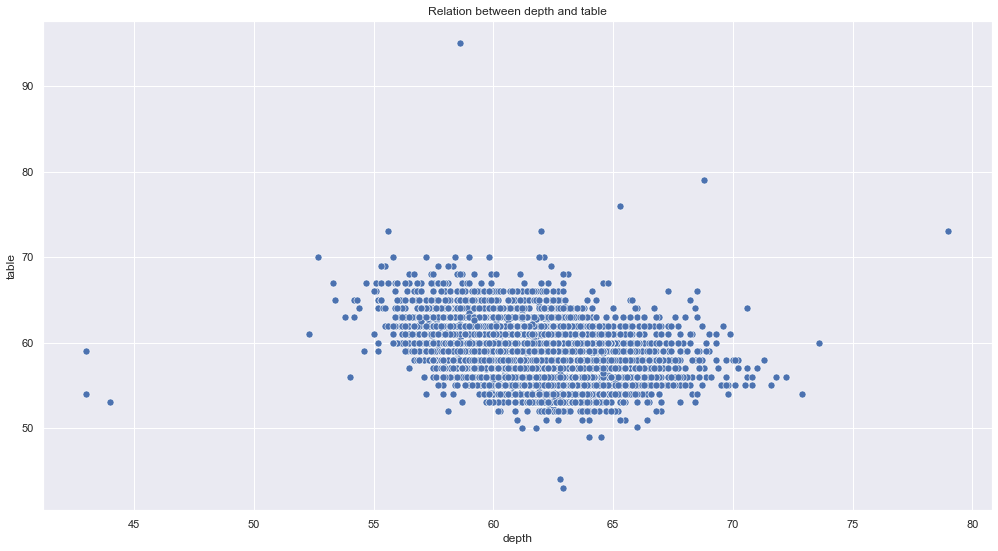

In [26]:
#Relation between depth and table
plt.figure(figsize=(17,9))
plt.title('Relation between depth and table')
sns.scatterplot(df['depth'],df['table'],s=50);

Podemos considerar como outliers los valores de depth<50 y los depth>75. Además, los table<50 y los table>75, que son los que salen de los valores normales.

In [27]:
df.drop(df[(df['depth']<50)|(df['depth']>75)].index, inplace= True)
df.drop(df[(df['table']<50)|(df['table']>75)].index, inplace= True)

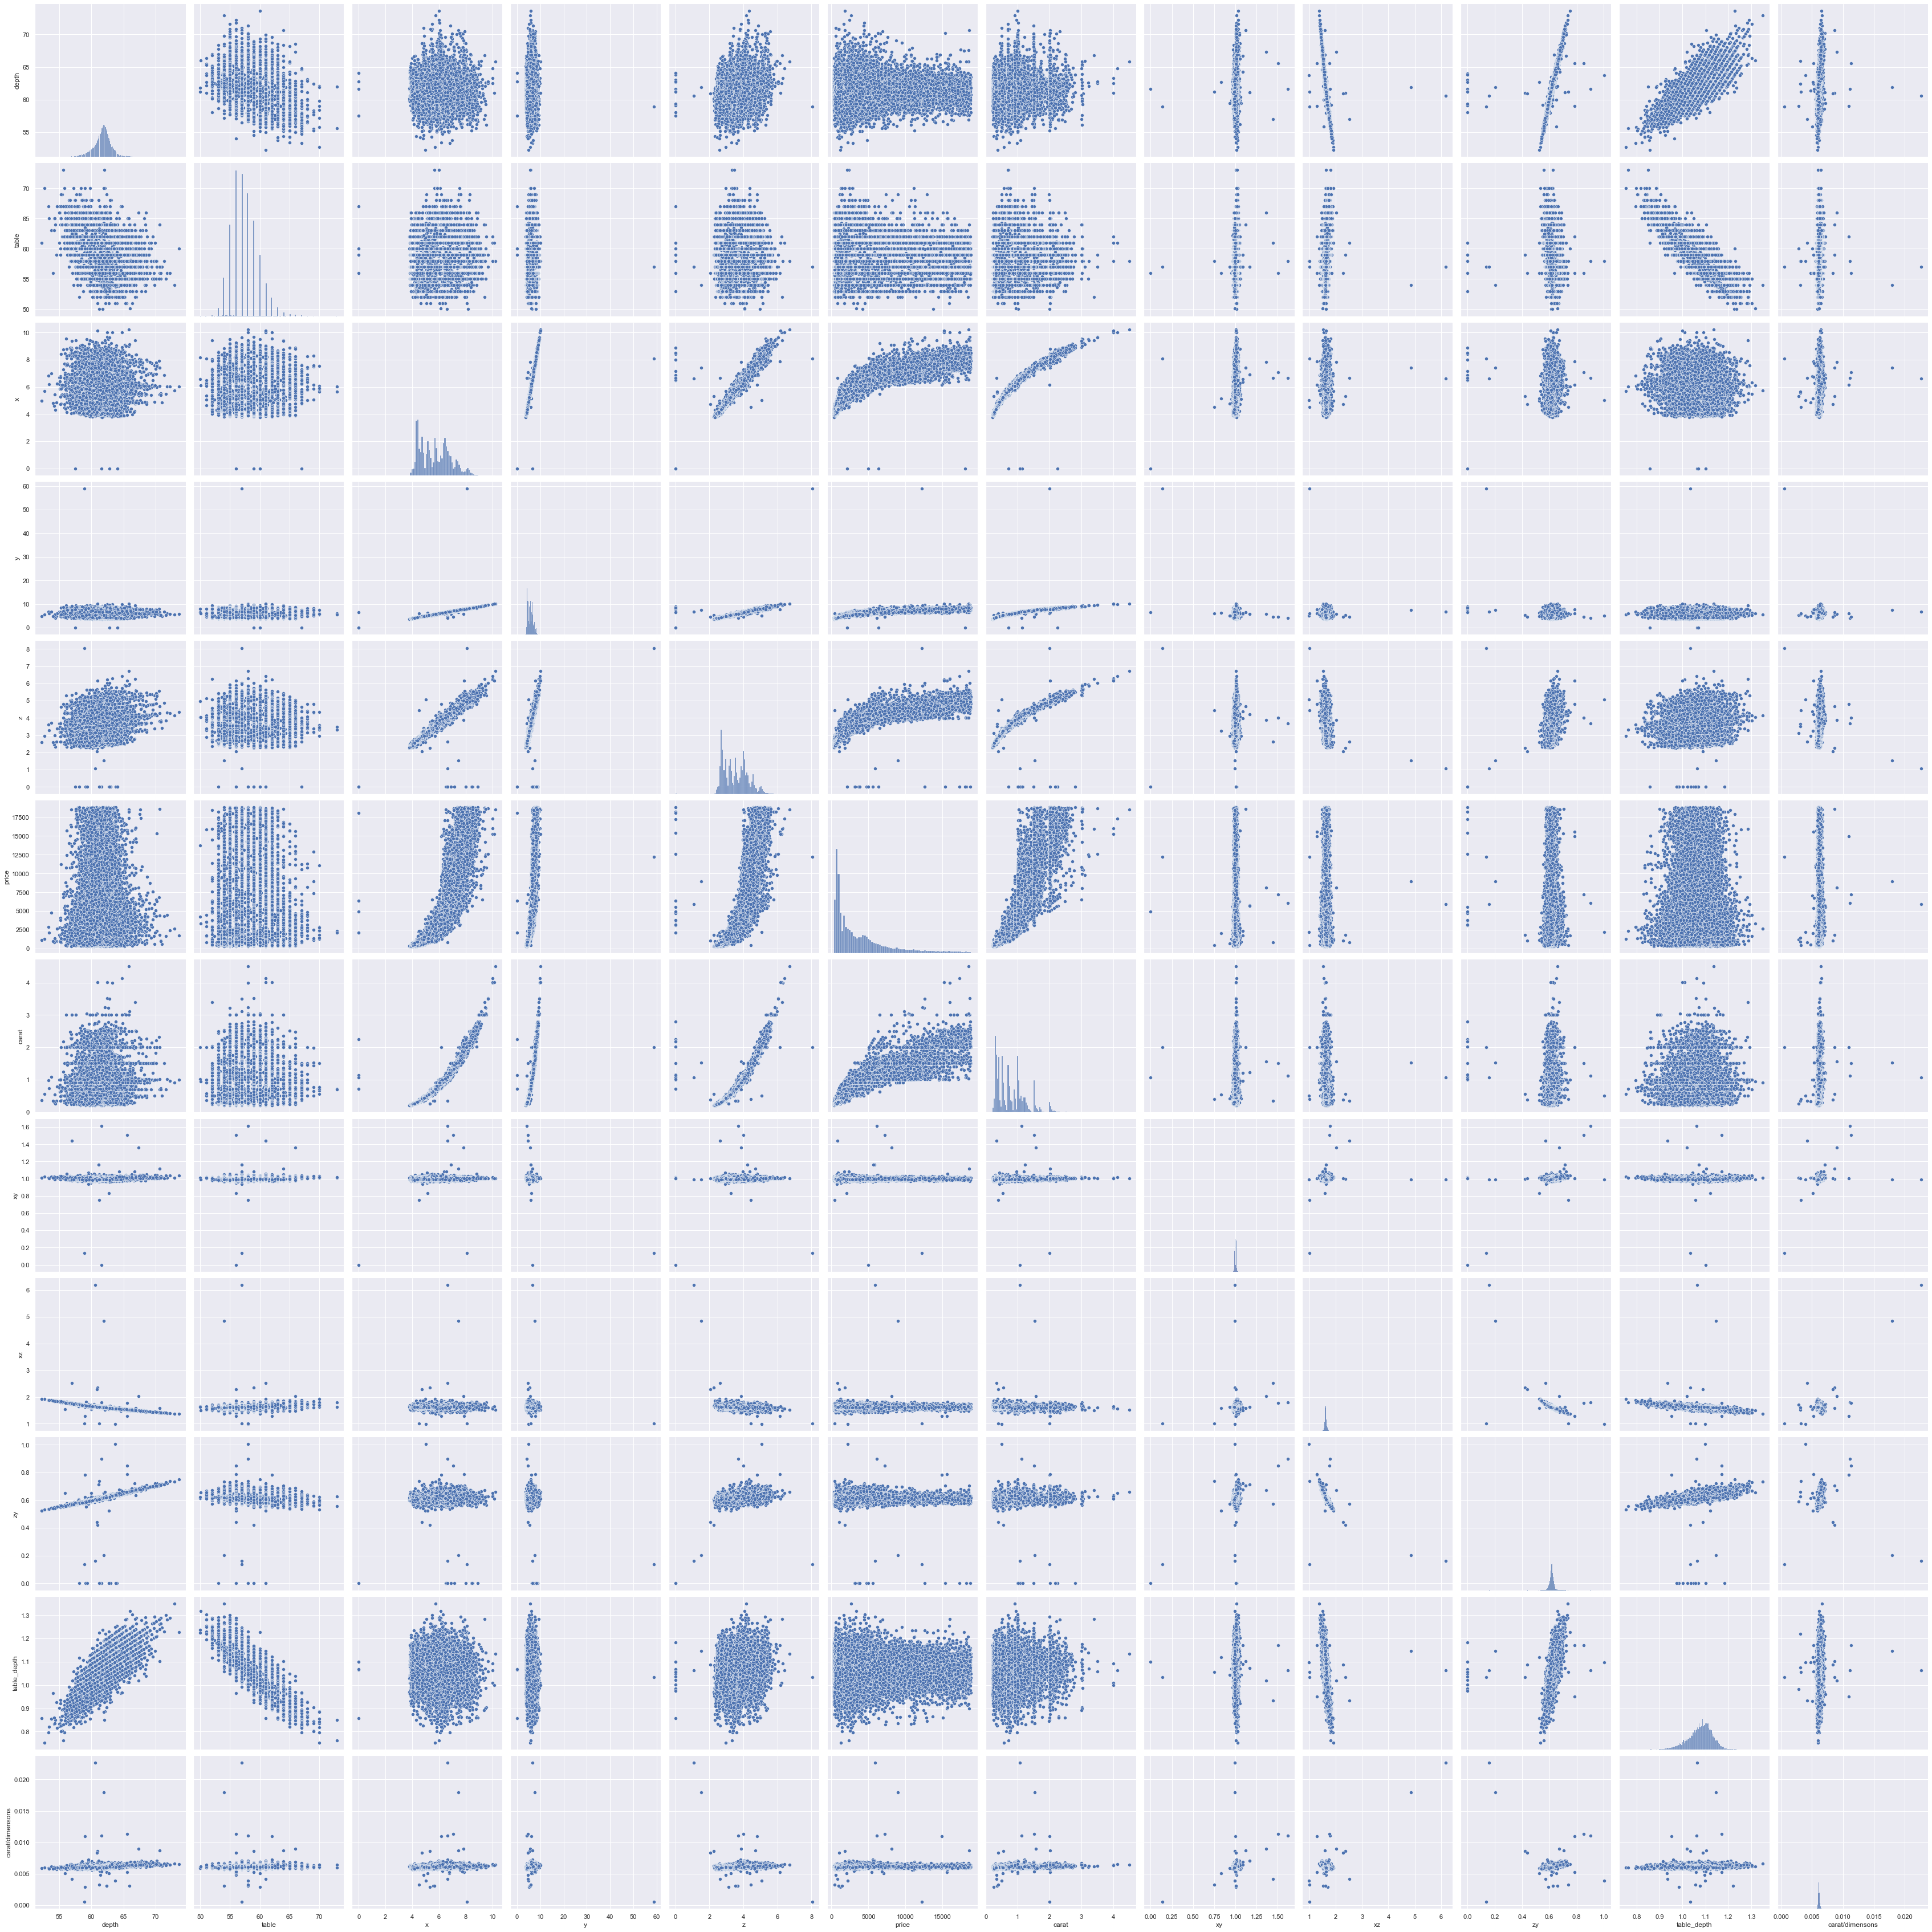

In [28]:
sns.pairplot(df,height=4);

Los outliers claramente son aquellos en los que tenemos valores de x,y,z = 0. Tambien hay un outlier de y=20, z>8 y z<2.

In [30]:
df.drop(df[(df['x']==0)].index, inplace= True)
df.drop(df[(df['y']==0)|(df['y']>20)].index, inplace= True)
df.drop(df[(df['z']<2)|(df['z']>8)].index, inplace= True)


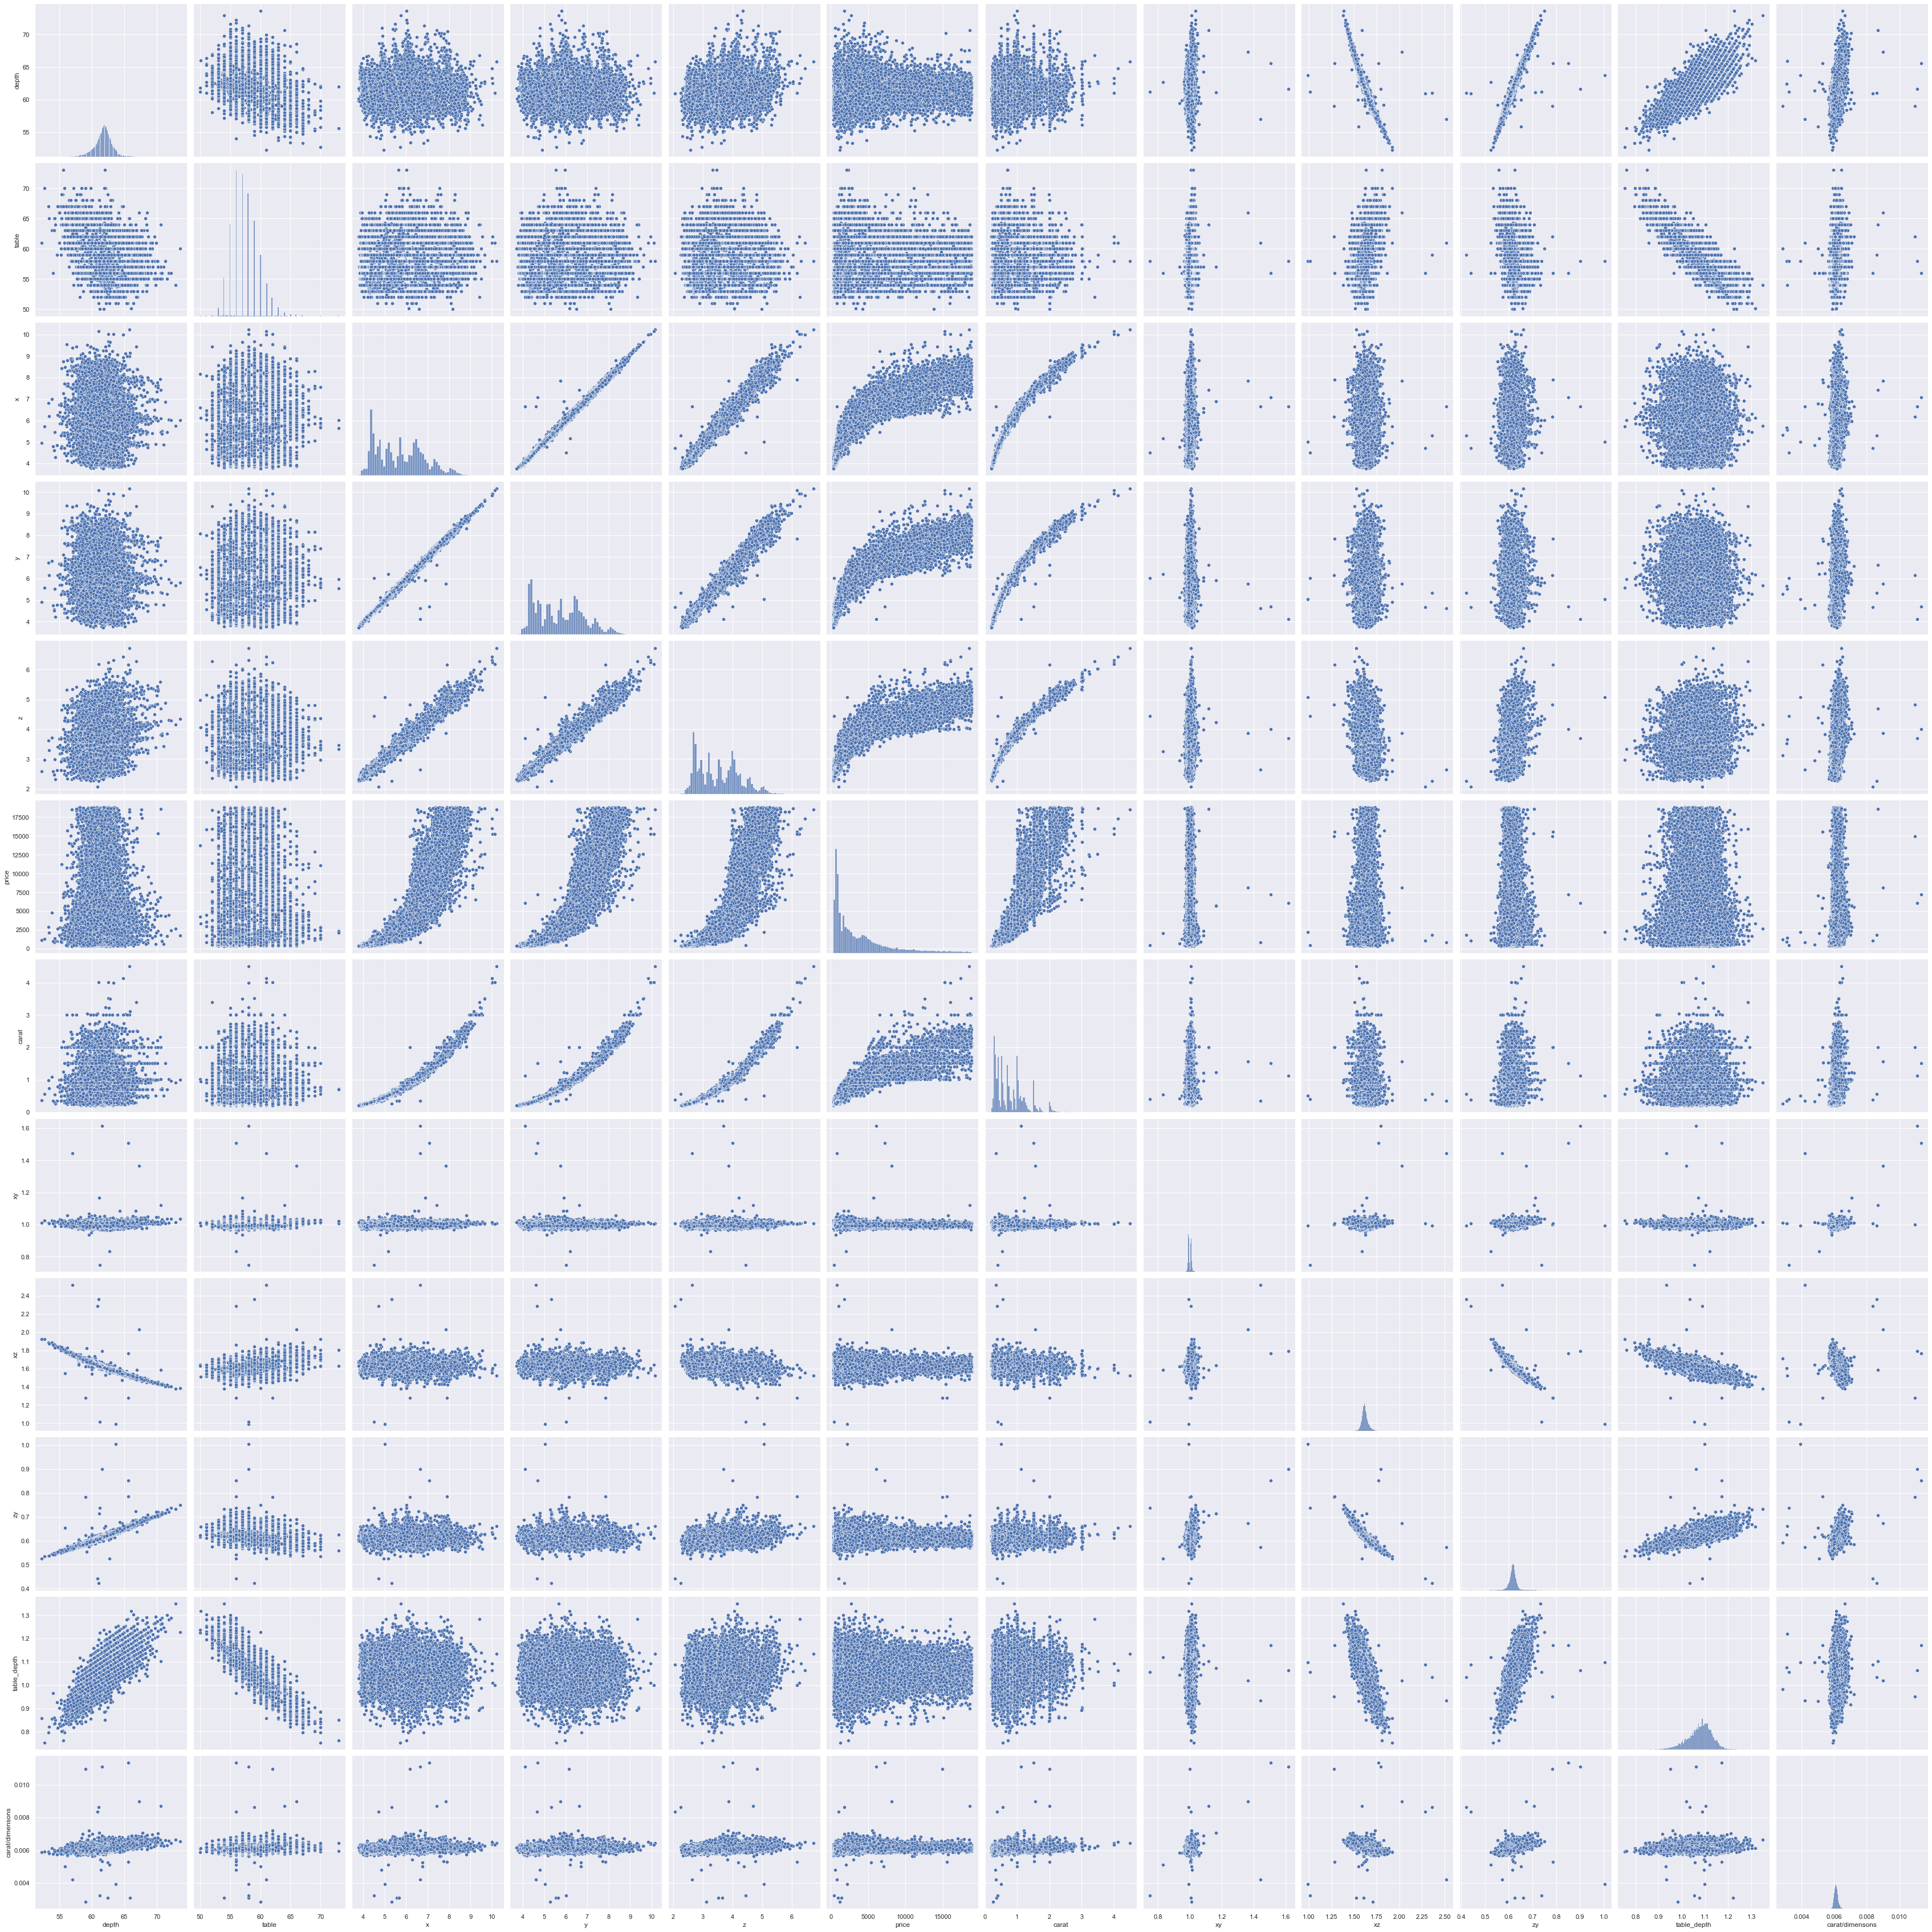

In [31]:
sns.pairplot(df,height=4);

[]

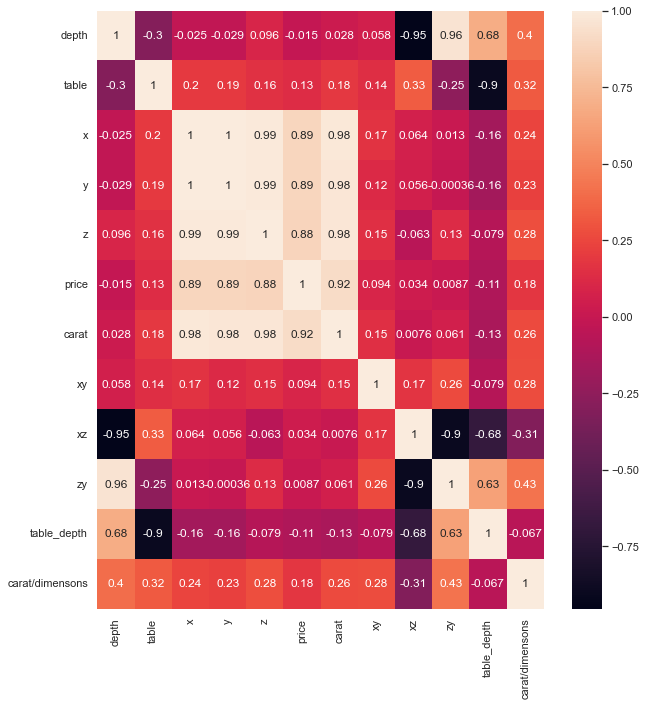

In [32]:
#Let's check the correlation:

plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Vemos una correlación muy muy alta, prácticamente de 1 entre algunos de los features, por lo tanto tocará eliminar alguno de ellos. 

In [33]:
df.to_csv('../data/train/diamonds_train_cleaned.csv')